In [20]:
import pandas as pd

pd.set_option("display.max_columns", None)  # Toont alle kolommen
pd.set_option("display.width", 100)  # Voorkomt afkapping van kolommen
pd.set_option("display.max_rows", 1400)  # Beperkt aantal rijen om overzichtelijk te blijven

In [21]:
df_Full_dataset = pd.read_csv('TEG_Data&Weather_2Years_WithNAN.csv')

In [22]:
import pandas as pd


missing_mask = df_Full_dataset['Ground_Temperature'].isna()

start_of_block = (missing_mask != missing_mask.shift()).cumsum()

na_blocks = missing_mask.groupby(start_of_block).first()

aantal_blokken = na_blocks.sum()

print(f"Aantal aaneengesloten blokken met missende waardes in 'Timestamp': {int(aantal_blokken)}")


Aantal aaneengesloten blokken met missende waardes in 'Timestamp': 8


In [23]:
df_Full_dataset

,Timestamp,Ground_Temperature,Ambient_Temperature,Sensor_T7,Sensor_T6,Sensor_T4,Sensor_T2,Sensor_T5,Sensor_T3,Sensor_T1,Ground_50cm_Temperature,TEG_Voltage,Voltage_across_Rs,Current (A),Power (W),Energy (J),precip_5min:mm,direct_rad:W,dew_point_2m:C,relative_humidity_2m:p,visibility:m,wind_dir_10m:d,wind_speed_10m:ms,sfc_pressure:Pa,t_2m:C
0,2022-10-01 00:00:00,13.033560,10.645626,12.304472,12.594827,13.096460,13.777693,12.962136,13.543691,13.965460,-0.144074,-0.345454,-0.023210,-0.232101,0.002673,0.026727,0.0,0.0,10.0,97.4,24024.7,171.9,1.0,98755,10.4
1,2022-10-01 00:05:00,13.022022,10.594993,12.274968,12.572273,13.087213,13.776275,12.948338,13.536906,13.962741,-0.144309,-0.352364,-0.023210,-0.232101,0.002726,0.027265,0.0,0.0,9.9,97.4,23961.7,174.1,1.0,98756,10.3
2,2022-10-01 00:10:00,13.009572,10.481287,12.213017,12.532345,13.077362,13.774642,12.927793,13.527916,13.959378,-0.144915,-0.370252,-0.024240,-0.242400,0.002991,0.029915,0.0,0.0,9.8,97.5,23898.8,176.2,1.1,98758,10.2
3,2022-10-01 00:15:00,12.995596,10.464873,12.194294,12.505709,13.067215,13.773003,12.903245,13.515260,13.955406,-0.144713,-0.364287,-0.023568,-0.235677,0.002862,0.028622,0.0,0.0,9.7,97.5,23835.9,178.4,1.1,98759,10.1
4,2022-10-01 00:20:00,12.981546,10.259936,12.181756,12.496570,13.057033,13.771391,12.890031,13.505622,13.951708,-0.144725,-0.364645,-0.024569,-0.245690,0.002986,0.029864,0.0,0.0,9.6,97.5,23773.0,180.6,1.2,98761,10.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
210523,2024-09-30 23:35:00,13.060445,8.529379,11.819792,12.329086,13.541565,14.866600,13.185623,14.271128,15.072208,-0.153499,-0.623317,-0.040526,-0.405264,0.008420,0.084200,0.0,0.0,3.8,88.6,37150.4,98.7,1.1,99300,5.5
210524,2024-09-30 23:40:00,13.037987,8.504681,11.794846,12.309572,13.523655,14.862293,13.172986,14.263903,15.068886,-0.153677,-0.628567,-0.040641,-0.406408,0.008516,0.085158,0.0,0.0,3.7,88.7,37075.7,99.5,1.1,99296,5.4
210525,2024-09-30 23:45:00,13.017120,8.490087,11.771017,12.291233,13.505460,14.858263,13.157865,14.255532,15.065275,-0.153806,-0.632350,-0.041349,-0.413489,0.008716,0.087158,0.0,0.0,3.7,88.8,37001.0,100.3,1.1,99292,5.4
210526,2024-09-30 23:50:00,12.995708,8.441970,11.734749,12.267400,13.487790,14.853716,13.140059,14.246040,15.061192,-0.154039,-0.639238,-0.042078,-0.420785,0.008966,0.089658,0.0,0.0,3.6,88.9,36926.3,101.1,1.1,99288,5.3


In [24]:
import pandas as pd

df = df_Full_dataset

df['Timestamp'] = pd.to_datetime(df['Timestamp'])
df = df.set_index('Timestamp')

correlation_with_target = df.corr(method='pearson')['Energy (J)'].drop('Energy (J)').sort_values(ascending=False)

print("Pearson correlatie van features met target (excl. target zelf):")
print(correlation_with_target)

Pearson correlatie van features met target (excl. target zelf):
Power (W)                  1.000000
Ground_50cm_Temperature    0.757133
TEG_Voltage                0.756889
Current (A)                0.755708
Voltage_across_Rs          0.755708
direct_rad:W               0.626406
Sensor_T7                  0.454215
Ambient_Temperature        0.430552
Sensor_T6                  0.398575
Sensor_T5                  0.345180
t_2m:C                     0.283313
Sensor_T3                  0.265922
Ground_Temperature         0.225127
Sensor_T4                  0.211654
Sensor_T1                  0.198739
Sensor_T2                  0.159122
dew_point_2m:C             0.110764
visibility:m               0.101855
sfc_pressure:Pa            0.041503
wind_speed_10m:ms          0.016033
precip_5min:mm            -0.024703
wind_dir_10m:d            -0.057909
relative_humidity_2m:p    -0.377097
Name: Energy (J), dtype: float64


In [25]:
df.drop(columns=['Power (W)', 'TEG_Voltage', 'Current (A)', 'Voltage_across_Rs', 'Sensor_T7', 'Sensor_T6',
                 'Sensor_T5', 'Sensor_T4', 'Sensor_T3', 'Sensor_T2', 'Sensor_T1', 't_2m:C'], inplace=True)

In [26]:
# Zorg dat 'Energy (J)' als laatste kolom komt
cols = [col for col in df.columns if col != 'Energy (J)'] + ['Energy (J)']
df = df[cols]

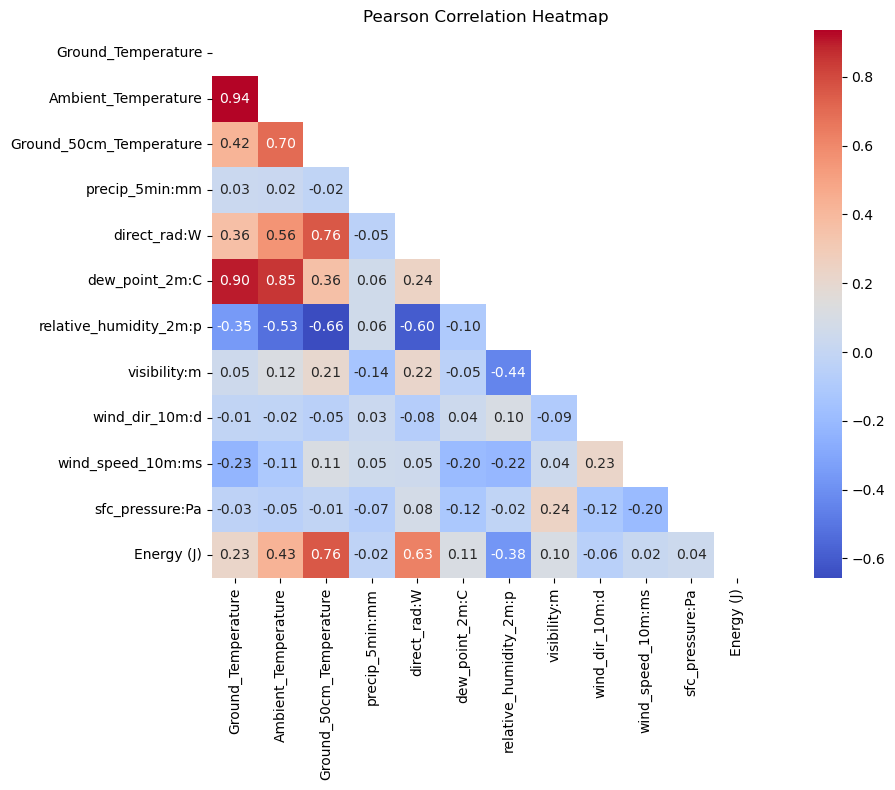

In [27]:
import matplotlib.pyplot as plt
import seaborn as sns
import numpy as np 

corr_matrix = df.corr(method='pearson')

mask = np.triu(np.ones_like(corr_matrix, dtype=bool))

plt.figure(figsize=(12, 8))
sns.heatmap(corr_matrix, mask = mask, annot=True, fmt=".2f", cmap="coolwarm", square=True)
plt.title("Pearson Correlation Heatmap")
plt.tight_layout()
plt.show()

In [28]:
df.isna().sum()

Ground_Temperature         896
Ambient_Temperature        896
Ground_50cm_Temperature    896
precip_5min:mm               0
direct_rad:W                 0
dew_point_2m:C               0
relative_humidity_2m:p       0
visibility:m                 0
wind_dir_10m:d               0
wind_speed_10m:ms            0
sfc_pressure:Pa              0
Energy (J)                   0
dtype: int64

In [29]:
import pandas as pd

df = df_Full_dataset

df['Timestamp'] = pd.to_datetime(df['Timestamp'])

df['Hour'] = df['Timestamp'].dt.hour
df['Minute'] = df['Timestamp'].dt.minute
df['Month'] = df['Timestamp'].dt.month

In [30]:
# 0) Copy & shift
df = df_Full_dataset.copy()

import numpy as np
import pandas as pd

df['Timestamp'] = pd.to_datetime(df['Timestamp'])
df = df.set_index('Timestamp')

df['Energy_lag_1'] = df['Energy (J)'].shift(1)
df['Energy_lag_2'] = df['Energy (J)'].shift(2)
df['Moving_average_energy_3'] = df['Energy (J)'].shift(1).rolling(window=3).mean()

df['Direct_radiation_lag_1'] = df['direct_rad:W'].shift(1)
df['Direct_radiation_lag_2'] = df['direct_rad:W'].shift(2)
df['Moving_average_direct_radiation_3'] = df['direct_rad:W'].shift(1).rolling(window=3).mean()

df['Ambient_Temperature_lag_1'] = df['Ambient_Temperature'].shift(1)
df['Ambient_Temperature_lag_2'] = df['Ambient_Temperature'].shift(2)
df['Moving_average_Ambient_Temperature_3'] = df['Ambient_Temperature'].shift(1).rolling(window=3).mean()

df['Ground_50cm_Temperature_lag_1'] = df['Ground_50cm_Temperature'].shift(1)
df['Ground_50cm_Temperature_lag_2'] = df['Ground_50cm_Temperature'].shift(2)
df['Moving_average_Ground_50cm_Temperature_3'] = df['Ground_50cm_Temperature'].shift(1).rolling(window=3).mean()

df['Hour_direct_interaction'] = df['Hour'] * df['direct_rad:W']

# forecast horizon
df['Energy_sum_target_30minutes'] = df['Energy (J)'].shift(-5).rolling(window=6, min_periods=6).sum()
df['Energy_sum_target_1hour'] = df['Energy (J)'].shift(-11).rolling(window=12, min_periods=12).sum()
df['Energy_sum_target_6hours'] = df['Energy (J)'].shift(-66).rolling(window=72, min_periods=72).sum()
df['Energy_sum_target_12hours'] = df['Energy (J)'].shift(-132).rolling(window=144, min_periods=144).sum()
df['Energy_sum_target_24hours'] = df['Energy (J)'].shift(-264).rolling(window=288, min_periods=288).sum()


In [31]:
df = df.reset_index()

In [32]:
df = df.dropna().reset_index(drop=True)

In [33]:
cols = [col for col in df.columns if col != 'Energy (J)'] + ['Energy (J)']
df = df[cols]


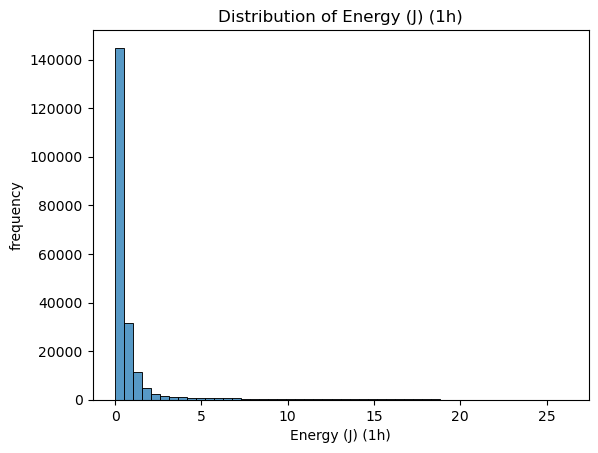

In [34]:
import seaborn as sns
import matplotlib.pyplot as plt

sns.histplot(df['Energy_sum_target_1hour'].dropna(), kde=False, bins=50)
plt.title('Distribution of Energy (J) (1h)')
plt.xlabel('Energy (J) (1h)')
plt.ylabel('frequency')
plt.show()


In [35]:
columns = ['Ground_50cm_Temperature', 'Ambient_Temperature', 'direct_rad:W', 'Energy_sum_target_1hour']

descriptive_stats = df[columns].describe().T  

print(descriptive_stats)


                            count       mean         std       min       25%        50%  \
Ground_50cm_Temperature  209057.0  -0.132830    0.020695 -0.186496 -0.144798  -0.138093   
Ambient_Temperature      209057.0  12.064087    8.222285 -7.922976  5.280530  11.468009   
direct_rad:W             209057.0  90.780547  184.670722  0.000000  0.000000   0.000000   
Energy_sum_target_1hour  209057.0   0.931097    2.391427 -0.000461  0.075031   0.253653   

                               75%         max  
Ground_50cm_Temperature  -0.127505   -0.020412  
Ambient_Temperature      18.033667   40.020153  
direct_rad:W             64.500000  838.000000  
Energy_sum_target_1hour   0.654357   26.118806  


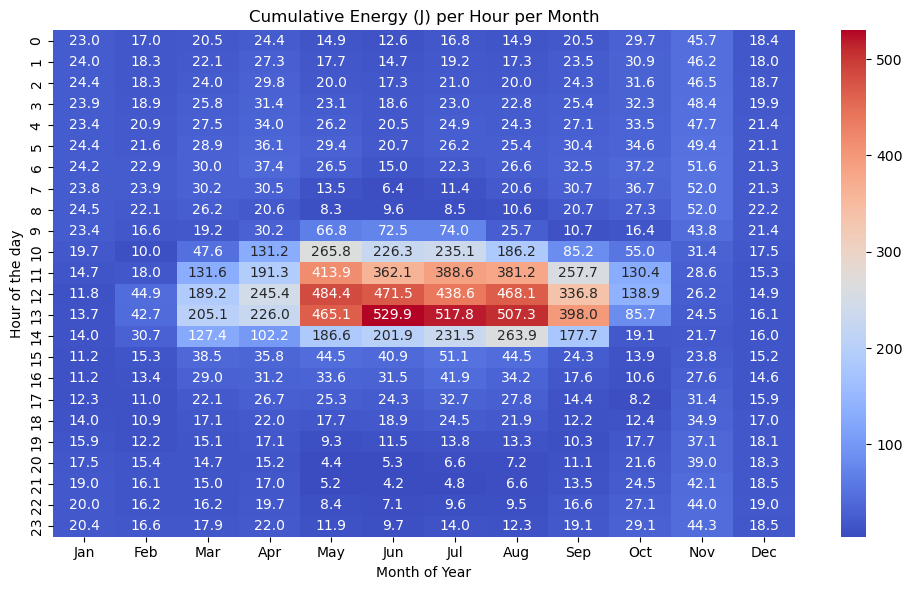

In [36]:
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt

df['Timestamp'] = pd.to_datetime(df['Timestamp'])

df['Hour'] = df['Timestamp'].dt.hour
df['Month'] = df['Timestamp'].dt.month_name().str[:3]  # 'Jan', 'Feb', etc.

pivot_table = df.groupby(['Hour', 'Month'])['Energy (J)'].sum().reset_index()

heatmap_data = pivot_table.pivot(index='Hour', columns='Month', values='Energy (J)')

month_order = ['Jan', 'Feb', 'Mar', 'Apr', 'May', 'Jun',
               'Jul', 'Aug', 'Sep', 'Oct', 'Nov', 'Dec']
heatmap_data = heatmap_data[month_order]

# Plot heatmap
plt.figure(figsize=(10, 6))
sns.heatmap(heatmap_data, cmap="coolwarm", annot=True, fmt=".1f")
plt.title('Cumulative Energy (J) per Hour per Month')
plt.xlabel('Month of Year')
plt.ylabel('Hour of the day')
plt.tight_layout()
plt.show()


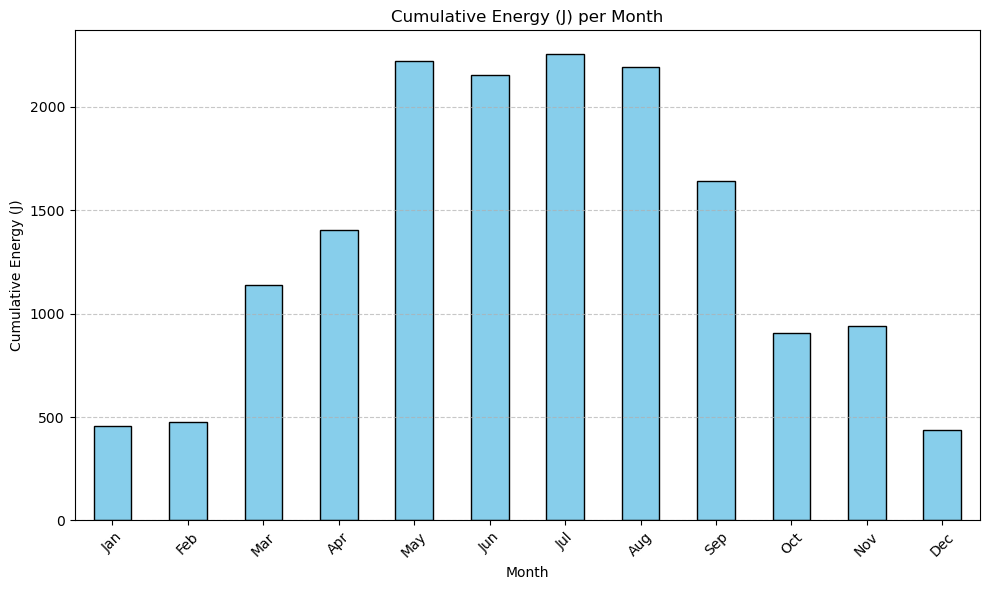

In [37]:
import pandas as pd
import matplotlib.pyplot as plt

df['Timestamp'] = pd.to_datetime(df['Timestamp'])

df['Month'] = df['Timestamp'].dt.month_name().str[:3]  # 'Jan', 'Feb', etc.

monthly_energy = df.groupby('Month')['Energy (J)'].sum()

month_order = ['Jan', 'Feb', 'Mar', 'Apr', 'May', 'Jun',
               'Jul', 'Aug', 'Sep', 'Oct', 'Nov', 'Dec']
monthly_energy = monthly_energy.reindex(month_order)

plt.figure(figsize=(10, 6))
monthly_energy.plot(kind='bar', color='skyblue', edgecolor='black')

plt.title('Cumulative Energy (J) per Month')
plt.xlabel('Month')
plt.ylabel('Cumulative Energy (J)')
plt.xticks(rotation=45)
plt.grid(axis='y', linestyle='--', alpha=0.7)
plt.tight_layout()
plt.show()


In [38]:
df['Timestamp'] = pd.to_datetime(df['Timestamp'])
df = df.set_index('Timestamp')


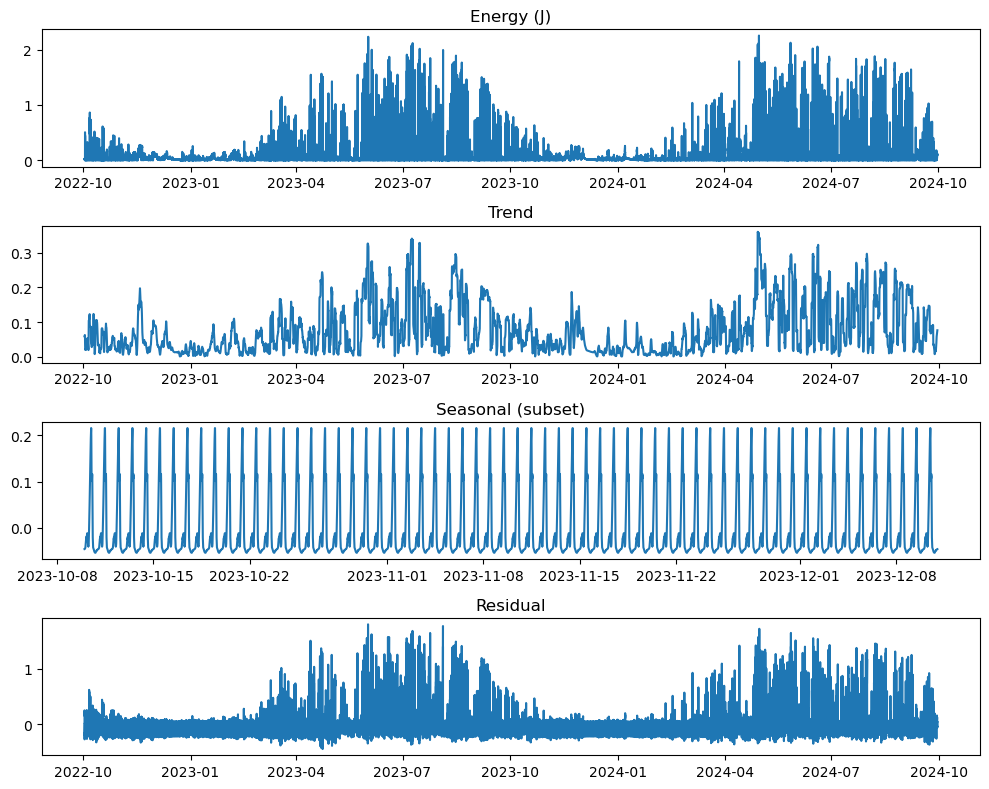

In [39]:
from statsmodels.tsa.seasonal import seasonal_decompose
import matplotlib.pyplot as plt

# Decompositie op volledige dataset
result = seasonal_decompose(df['Energy (J)'], model='additive', period=288)

# Bepaal tijdsvenster voor seasonal (bijv. 2 maanden)
seasonal_start = '2023-10-10'
seasonal_end = '2023-12-10'
seasonal_slice = result.seasonal.loc[seasonal_start:seasonal_end]

# Plot
fig, axs = plt.subplots(4, 1, figsize=(10, 8), sharex=False)

axs[0].plot(result.observed, label='Original')
axs[0].set_title('Energy (J)')

axs[1].plot(result.trend, label='Trend')
axs[1].set_title('Trend')

axs[2].plot(seasonal_slice, label='Seasonal (2 months only)')
axs[2].set_title('Seasonal (subset)')

axs[3].plot(result.resid, label='Residual')
axs[3].set_title('Residual')

plt.tight_layout()
plt.show()


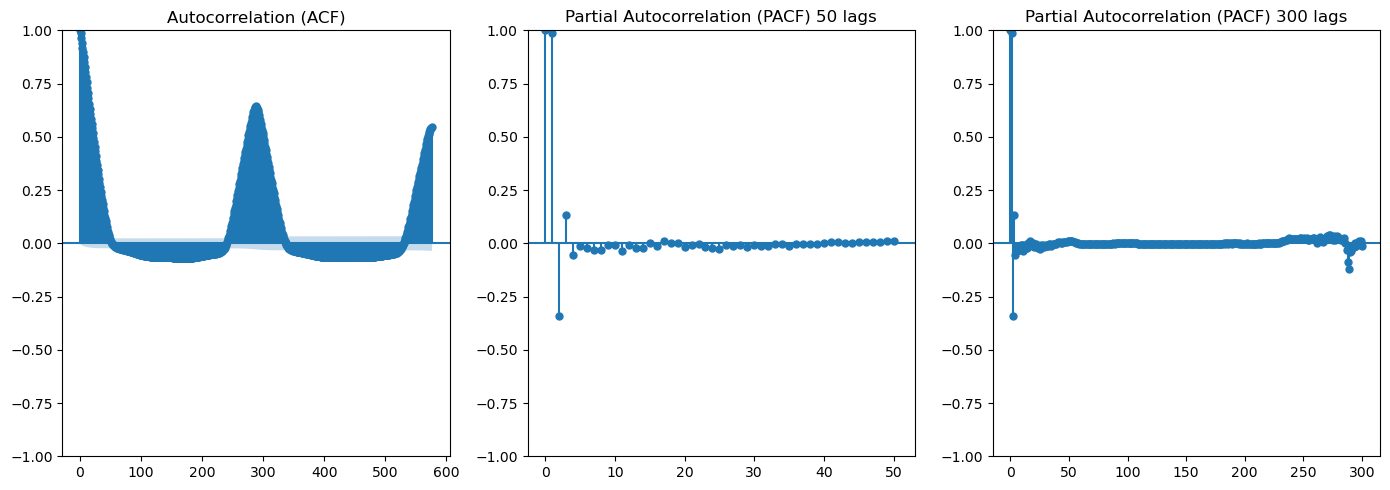

In [ ]:
from statsmodels.graphics.tsaplots import plot_acf, plot_pacf
import matplotlib.pyplot as plt

series = df['Energy (J)'].dropna()

fig, axes = plt.subplots(1, 3, figsize=(14, 5))

# Plot ACF
plot_acf(series, lags=576, ax=axes[0])
axes[0].set_title('Autocorrelation (ACF)')

# Plot PACF
plot_pacf(series, lags=50, method='ywm', ax=axes[1])
axes[1].set_title('Partial Autocorrelation (PACF) 50 lags')

# Plot PACF
plot_pacf(series, lags=300, method='ywm', ax=axes[2])
axes[2].set_title('Partial Autocorrelation (PACF) 300 lags')

plt.tight_layout()
plt.show()


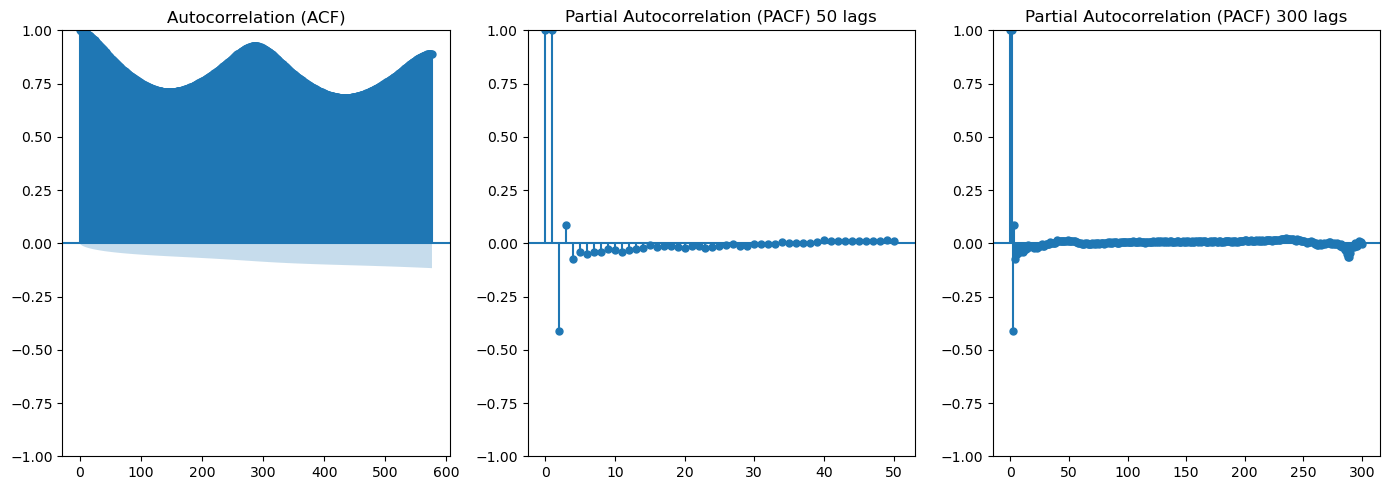

In [ ]:
from statsmodels.graphics.tsaplots import plot_acf, plot_pacf
import matplotlib.pyplot as plt

series = df['Ambient_Temperature'].dropna()

fig, axes = plt.subplots(1, 3, figsize=(14, 5))

# Plot ACF
plot_acf(series, lags=576, ax=axes[0])
axes[0].set_title('Autocorrelation (ACF)')

# Plot PACF
plot_pacf(series, lags=50, method='ywm', ax=axes[1])
axes[1].set_title('Partial Autocorrelation (PACF) 50 lags')

# Plot PACF
plot_pacf(series, lags=300, method='ywm', ax=axes[2])
axes[2].set_title('Partial Autocorrelation (PACF) 300 lags')

plt.tight_layout()
plt.show()

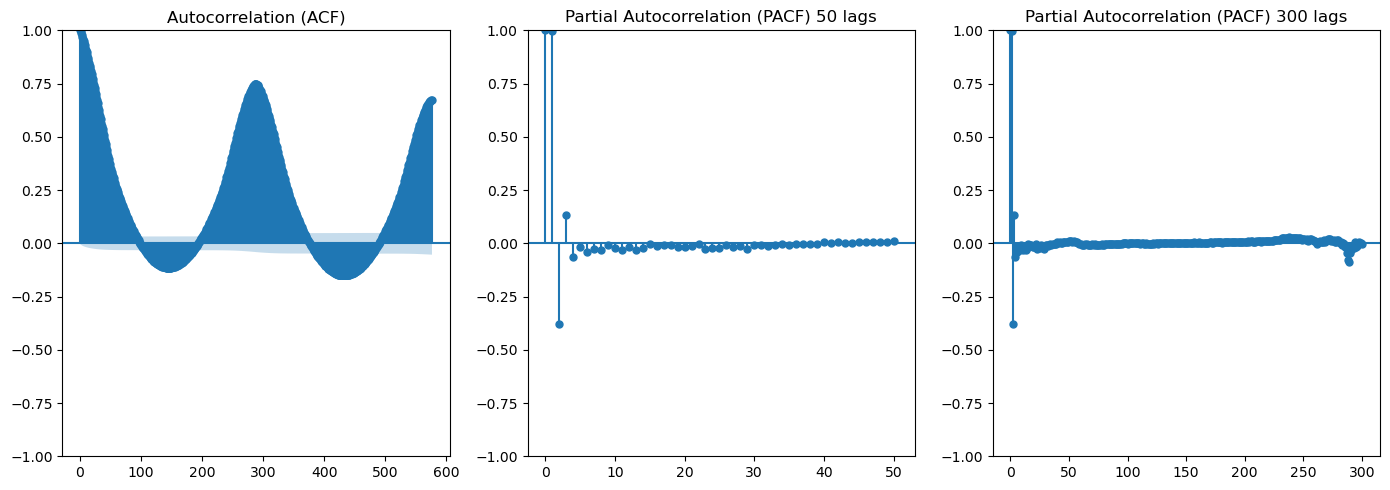

In [ ]:
from statsmodels.graphics.tsaplots import plot_acf, plot_pacf
import matplotlib.pyplot as plt

series = df['Ground_50cm_Temperature'].dropna()

fig, axes = plt.subplots(1, 3, figsize=(14, 5))

# Plot ACF
plot_acf(series, lags=576, ax=axes[0])
axes[0].set_title('Autocorrelation (ACF)')

# Plot PACF
plot_pacf(series, lags=50, method='ywm', ax=axes[1])
axes[1].set_title('Partial Autocorrelation (PACF) 50 lags')

# Plot PACF
plot_pacf(series, lags=300, method='ywm', ax=axes[2])
axes[2].set_title('Partial Autocorrelation (PACF) 300 lags')

plt.tight_layout()
plt.show()

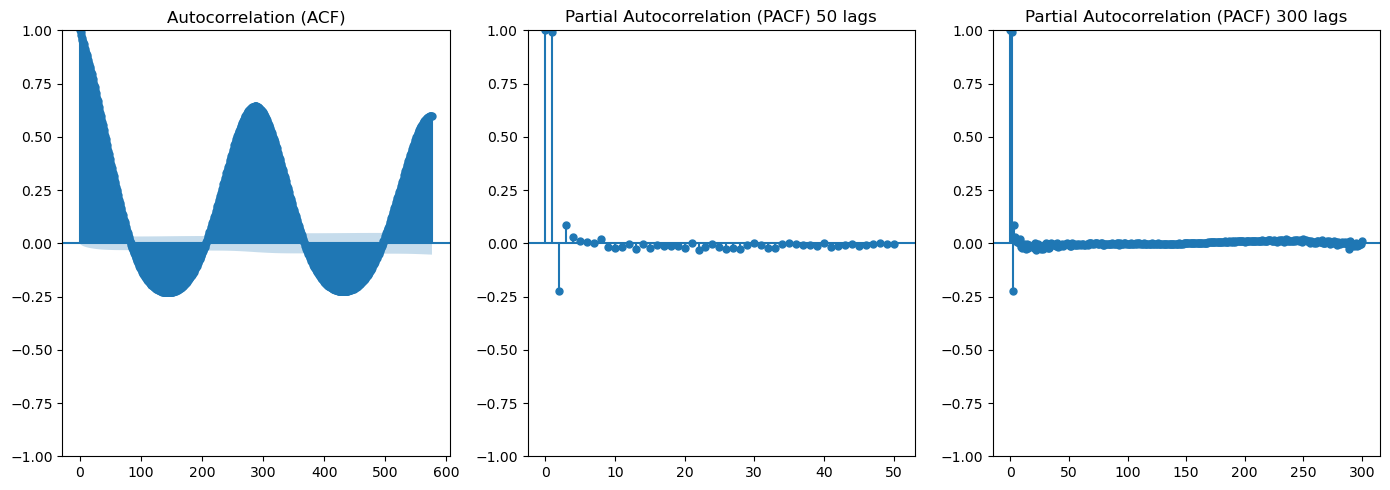

In [ ]:
from statsmodels.graphics.tsaplots import plot_acf, plot_pacf
import matplotlib.pyplot as plt

series = df['direct_rad:W'].dropna()

fig, axes = plt.subplots(1, 3, figsize=(14, 5))

# Plot ACF
plot_acf(series, lags=576, ax=axes[0])
axes[0].set_title('Autocorrelation (ACF)')

# Plot PACF
plot_pacf(series, lags=50, method='ywm', ax=axes[1])
axes[1].set_title('Partial Autocorrelation (PACF) 50 lags')

# Plot PACF
plot_pacf(series, lags=300, method='ywm', ax=axes[2])
axes[2].set_title('Partial Autocorrelation (PACF) 300 lags')


plt.tight_layout()
plt.show()


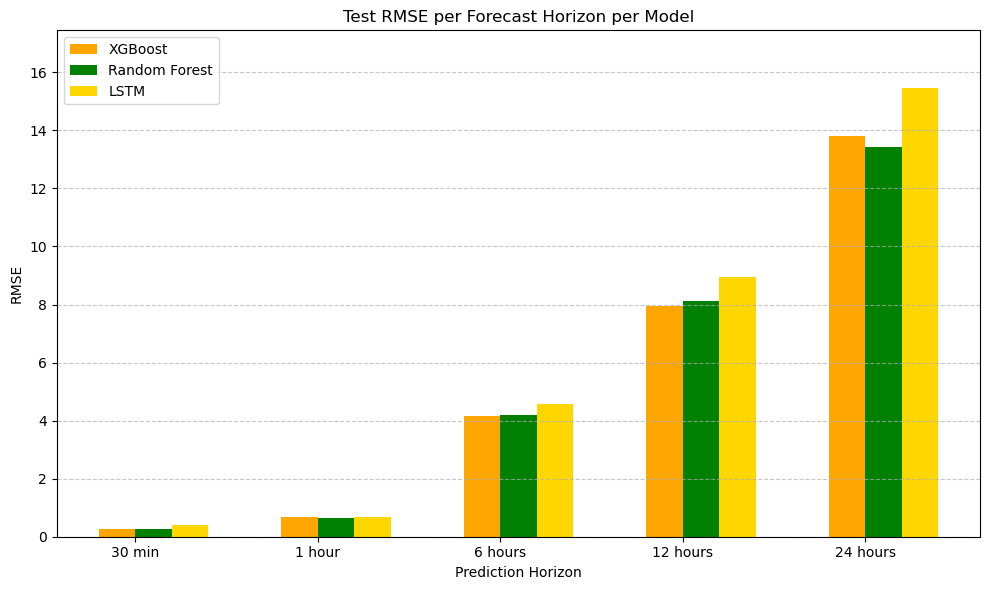

In [ ]:
import matplotlib.pyplot as plt
import numpy as np

horizons = ["30 min", "60 min", "360 min", "720 min", "1440 min"]
horizons_labels = ["30 min", "1 hour", "6 hours", "12 hours", "24 hours"]

xgb_rmse = [0.279, 0.678, 4.142, 7.951, 13.799]     # XGBoost
rf_rmse = [0.252, 0.655, 4.201, 8.127, 13.438]      # Random Forest
lstm_rmse = [0.391, 0.689, 4.558, 8.936, 15.445]    # LSTM


x = np.arange(len(horizons))
width = 0.2

# Create plot
plt.figure(figsize=(10, 6))
plt.bar(x - 0.5*width, xgb_rmse, width, label='XGBoost', color='orange')
plt.bar(x + 0.5*width, rf_rmse, width, label='Random Forest', color='green')
plt.bar(x + 1.5*width, lstm_rmse, width, label='LSTM', color='gold')

# Labels and title
plt.ylabel("RMSE")
plt.xlabel("Prediction Horizon")
plt.title("Test RMSE per Forecast Horizon per Model")
plt.xticks(ticks=x, labels=horizons_labels)
plt.ylim(0, max(lstm_rmse) + 2)
plt.legend()
plt.grid(axis='y', linestyle='--', alpha=0.7)
plt.tight_layout()
plt.show()
